# Impute Weekly Daily

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.convolution import interpolate_replace_nans, Gaussian2DKernel
import sys
sys.path.append('../conv_imputer')
import gen_synth
import impute_weekly

## pivoting the time series

In [2]:
data = gen_synth.weekly_daily_signal()
data

E:\Python\HRI\convolution-imputation\research\../conv_imputer\gen_synth.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_range = pd.date_range(start=start_date, periods=24*7*num_weeks, freq='H')


2023-01-02 00:00:00    4.000000
2023-01-02 01:00:00    4.261437
2023-01-02 02:00:00    4.437959
2023-01-02 03:00:00    4.519890
2023-01-02 04:00:00    4.503898
                         ...   
2023-01-29 19:00:00    2.089548
2023-01-29 20:00:00    2.473763
2023-01-29 21:00:00    2.881748
2023-01-29 22:00:00    3.288499
2023-01-29 23:00:00    3.669016
Freq: h, Length: 672, dtype: float64

In [3]:
previous_day = data.shift(-24) 
next_day = data.shift(24)

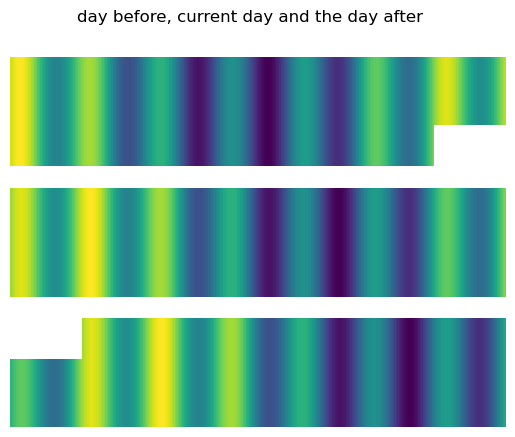

In [4]:
fig, (ax1,ax2,ax3) = plt.subplots(3, 1)
fig.suptitle('day before, current day and the day after')
ax1.imshow(impute_weekly.get_pivoted_weekly(previous_day).iloc[:,1:], aspect='auto')
ax2.imshow(impute_weekly.get_pivoted_weekly(data).iloc[:,1:], aspect='auto')
ax3.imshow(impute_weekly.get_pivoted_weekly(next_day).iloc[:,1:], aspect='auto')

ax1.set_axis_off()
ax2.set_axis_off()
ax3.set_axis_off()

## 3d imputation

In [5]:
hours_per_day = 24
hours_per_week = 7 * hours_per_day
number_of_weeks = 4

arr = np.zeros((hours_per_day, hours_per_week, number_of_weeks))

arr[(0,0,0)] = np.nan # set nan value

In [6]:
np.count_nonzero(arr)

1

In [7]:
val = 1/27
kernel = np.reshape([1/27]*27,(3,3,3)) # define 3d kernel

In [8]:
kernel.shape

(3, 3, 3)

In [9]:
kernel.sum()

0.9999999999999998

In [10]:
imputed = interpolate_replace_nans(arr, kernel) # interpolate

In [11]:
np.count_nonzero(imputed) # check number of nans

0